# Subjective Evaluation Results Analysis

This notebook includes the wrangling of the original .xlsx table we got from Google Sheets to create graphical output

## Creating the dataset

In [19]:
library(tidyverse)
library(readxl)
library(dplyr)
library(ggplot2)
options(repr.plot.width=5, repr.plot.height=3)

In [10]:
obj_data <- read_excel('muusika.xlsx')

true_values <- read_excel('true_values.xlsx')


obj_data <- obj_data %>% 
  tibble::rowid_to_column("ID") %>% 
  gather("group_and_track","position",colnames(obj_data)[2:31]) %>% 
  mutate(voting_group=as.numeric(str_split(group_and_track,". ",simplify = TRUE)[,1])) %>% 
  mutate(track = as.numeric(str_sub(group_and_track,-2,-2))) %>% 
  mutate(pos = as.factor(substr(position,1,1)))

full_data <- obj_data %>% 
  full_join(true_values,by=c('voting_group'='group','track'='track'))

## Overall ranking of tracks of different origin

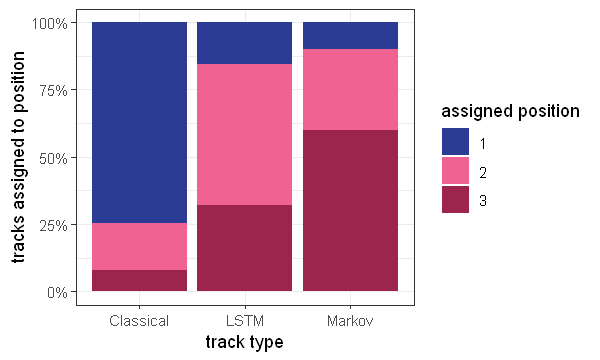

In [21]:
# position dataset to summarise the nr of times a track of certain type was rated on each position
position_n <- full_data %>% 
  group_by(tr_type,pos) %>% 
  summarise(count_n = n()) 

# bar plot visualization
ggplot(position_n,aes(x=tr_type,y = count_n, fill=pos)) +
  geom_bar(stat="identity",position="fill") +
  scale_fill_manual(values = c("#2c3c94", "#f06292", "#9c254d")) +
  labs(y="tracks assigned to position",x = "track type",fill="assigned position")+
  scale_y_continuous(labels=scales::percent)+
  theme_bw()

## Ranking of tracks when analyzing each voting round separately

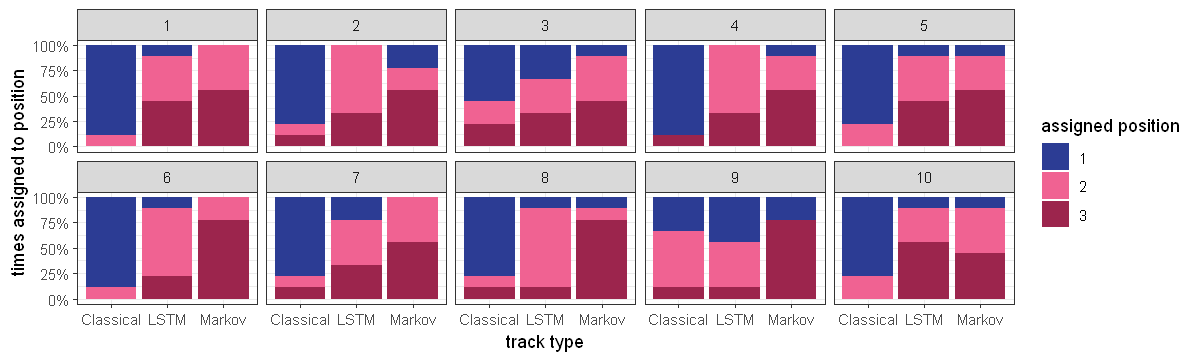

In [23]:
options(repr.plot.width=10, repr.plot.height=3)
position_n_gr <- full_data %>% 
  group_by(voting_group,tr_type,pos) %>% 
  summarise(count_n = n()) 

ggplot(position_n_gr,aes(x=tr_type,y = count_n, fill=pos)) +
  geom_bar(stat="identity",position="fill") +
  scale_fill_manual(values = c("#2c3c94", "#f06292", "#9c254d")) +
  labs(y="times assigned to position",x = "track type",fill="assigned position")+
  scale_y_continuous(labels=scales::percent)+
  theme_bw()+
  facet_wrap(~voting_group,ncol=5) # creates a separate graph for each voting group